In [4]:
import warnings
warnings.filterwarnings("ignore")


# Importing libraries

In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go


# Load data

In [6]:
kickstarter_df = pd.read_csv("./inputs/kickstarter_data_full.csv", low_memory=False)


# Naive feature selection

In [7]:
kickstarter_df.drop(
    columns=["index", "Unnamed: 0", "id", "location"], inplace=True
)  # location is not needed because we have country


# Check for features with zero variance and remove if there is

In [8]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


friends        1
is_starred     1
is_backing     1
permissions    1
dtype: int64

In [9]:
kickstarter_df.drop(
    columns=(kickstarter_df.nunique()[kickstarter_df.nunique() == 1]).index.to_list(),
    inplace=True,
)


In [10]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


Series([], dtype: int64)

# Remove features with more that 50% missing values

In [11]:
# check for features with more than 50% missing values
kickstarter_df.isnull().sum()[kickstarter_df.isnull().sum() > 0.5 * len(kickstarter_df)]


Series([], dtype: int64)

# Check rows with missing values

In [12]:
kickstarter_df.isnull().any(axis=1).sum()


1895

In [13]:
# check for features that have missing values
kickstarter_df.isnull().sum()[kickstarter_df.isnull().sum() > 0]

blurb                 6
category           1889
name_len              5
name_len_clean        5
blurb_len             5
blurb_len_clean       5
dtype: int64

In [14]:
# handle missing values for blurb
kickstarter_df["blurb"].fillna("", inplace=True)


In [15]:
country_df = kickstarter_df["country"].value_counts().to_frame().reset_index()
# map the country codes to country names
country_df["country"] = country_df["country"].map(
    {
        "US": "United States",
        "GB": "United Kingdom",
        "CA": "Canada",
        "AU": "Australia",
        "DE": "Germany",
        "FR": "France",
        "NL": "Netherlands",
        "IT": "Italy",
        "ES": "Spain",
        "SE": "Sweden",
        "MX": "Mexico",
        "NZ": "New Zealand",
        "DK": "Denmark",
        "IE": "Ireland",
        "CH": "Switzerland",
        "NO": "Norway",
        "BE": "Belgium",
        "AT": "Austria",
        "HK": "Hong Kong",
        "SG": "Singapore",
        "LU": "Luxembourg",
        "JP": "Japan",
    }
)
country_norm = kickstarter_df.value_counts(["country"], normalize=True)
country_df["norm"] = country_norm.values
country_df["label"] = country_df.apply(
    lambda x: x["country"] if x["norm"] >= 0.03 else "other", axis=1
)
other_country_df = country_df[country_df["label"] == "other"]
country_df.drop(other_country_df.index, inplace=True)
group_other_country_df = other_country_df.groupby("label").sum().reset_index()
country_df = pd.concat([country_df, group_other_country_df], axis=0)
country_df.drop(columns=["country"], inplace=True)
import plotly.graph_objects as go

# Pie chart for the distribution of the country, category, currency, created_at_weekday
# under 3
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=country_df["label"],
        values=country_df["count"],
        name="country",
        text=country_df["label"],
    )
)
fig.update_layout(
    width=800,
    height=800,
    title_text="Distribution of the country",
    annotations=[
        dict(
            showarrow=False,
            x=0.5,
            y=0.5,
            text="",
            font_size=20,
            font_family="Arial",
        )
    ],
)

fig.show()


In [16]:
currency_df = kickstarter_df["currency"].value_counts().to_frame().reset_index()
currency_df["currency"] = currency_df["currency"].map(
    {
        "USD": "US Dollar",
        "GBP": "British Pound Sterling",
        "CAD": "Canadian Dollar",
        "AUD": "Australian Dollar",
        "EUR": "Euro",
        "SEK": "Swedish Krona",
        "NZD": "New Zealand Dollar",
        "DKK": "Danish Krone",
        "NOK": "Norwegian Krone",
        "CHF": "Swiss Franc",
        "MXN": "Mexican Peso",
        "HKD": "Hong Kong Dollar",
        "SGD": "Singapore Dollar",
        "JPY": "Japanese Yen",
    }
)
currency_norm = kickstarter_df.value_counts(["currency"], normalize=True)
currency_df["norm"] = currency_norm.values
currency_df["label"] = currency_df.apply(
    lambda x: x["currency"] if x["norm"] >= 0.03 else "other", axis=1
)
other_currency_df = currency_df[currency_df["label"] == "other"]
currency_df.drop(other_currency_df.index, inplace=True)
group_other_currency_df = other_currency_df.groupby("label").sum().reset_index()
currency_df = pd.concat([currency_df, group_other_currency_df], axis=0)
currency_df.drop(columns=["currency"], inplace=True)
import plotly.graph_objects as go

# Pie chart for the distribution of the country, category, currency, created_at_weekday
# under 3
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=currency_df["label"],
        values=currency_df["count"],
        name="currency",
        text=currency_df["label"],
    )
)
fig.update_layout(
    width=800,
    height=800,
    title_text="Distribution of the currency",
    annotations=[
        dict(
            showarrow=False,
            x=0.5,
            y=0.5,
            text="",
            font_size=20,
            font_family="Arial",
        )
    ],
)
fig.show()

In [17]:
category_df = kickstarter_df["category"].value_counts().to_frame().reset_index()
category_norm = kickstarter_df.value_counts(["category"], normalize=True)
category_df["norm"] = category_norm.values
category_df["label"] = category_df.apply(
    lambda x: x["category"] if x["norm"] >= 0.03 else "other", axis=1
)
other_category_df = category_df[category_df["label"] == "other"]
category_df.drop(other_category_df.index, inplace=True)
group_other_category_df = other_category_df.groupby("label").sum().reset_index()
category_df = pd.concat([category_df, group_other_category_df], axis=0)
category_df.drop(columns=["category"], inplace=True)
import plotly.graph_objects as go

# Pie chart for the distribution of the country, category, currency, created_at_weekday
# under 3
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=category_df["label"],
        values=category_df["count"],
        name="category",
        text=category_df["label"],
    )
)
fig.update_layout(
    width=800,
    height=800,
    title_text="Distribution of the category",
    annotations=[
        dict(
            showarrow=False,
            x=0.5,
            y=0.5,
            text="",
            font_size=20,
            font_family="Arial",
        )
    ],
)
fig.show()

In [18]:
weekday_df = kickstarter_df["created_at_weekday"].value_counts().to_frame().reset_index()
weekday_norm = kickstarter_df.value_counts(["created_at_weekday"], normalize=True)
weekday_df["norm"] = weekday_norm.values
weekday_df["label"] = weekday_df.apply(
    lambda x: x["created_at_weekday"] if x["norm"] >= 0.03 else "other", axis=1
)
other_weekday_df = weekday_df[weekday_df["label"] == "other"]
weekday_df.drop(other_weekday_df.index, inplace=True)
group_other_weekday_df = other_weekday_df.groupby("label").sum().reset_index()
weekday_df = pd.concat([weekday_df, group_other_weekday_df], axis=0)
weekday_df.drop(columns=["created_at_weekday"], inplace=True)
import plotly.graph_objects as go

# Pie chart for the distribution of the country, category, currency, created_at_weekday
# under 3
fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=weekday_df["label"],
        values=weekday_df["count"],
        name="weekday",
        text=weekday_df["label"],
    )
)
fig.update_layout(
    width=800,
    height=800,
    title_text="Distribution of the weekday",
    annotations=[
        dict(
            showarrow=False,
            x=0.5,
            y=0.5,
            text="",
            font_size=20,
            font_family="Arial",
        )
    ],
)
fig.show()

In [19]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5)


In [20]:
# handle missing values for category
catgory_dict = {
    name: i for i, name in enumerate(kickstarter_df["category"].unique().tolist())
}


def get_category_id(x):
    return np.nan if pd.isnull(x) else catgory_dict[x]


# transform all 
kickstarter_df["category"] = kickstarter_df["category"].apply(get_category_id)
kickstarter_df["category"] = knn_imputer.fit_transform(
    kickstarter_df["category"].values.reshape(-1, 1)
)

# inverse transform category
kickstarter_df["category"] = kickstarter_df["category"].apply(
    lambda x: list(catgory_dict.keys())[int(x)]
)


In [21]:
kickstarter_df["category"].isnull().sum()

0

In [22]:
# handle missing values for name_len
kickstarter_df["name_len"] = knn_imputer.fit_transform(kickstarter_df[["name_len"]])


In [23]:
# handle missing values for name_len_clean
kickstarter_df["name_len_clean"] = knn_imputer.fit_transform(
    kickstarter_df[["name_len_clean"]]
)


In [24]:
# handle missing values for blurb_len
kickstarter_df["blurb_len"] = knn_imputer.fit_transform(kickstarter_df[["blurb_len"]])

In [25]:
# handle missing values for name_len_clean
kickstarter_df["blurb_len_clean"] = knn_imputer.fit_transform(
    kickstarter_df[["blurb_len_clean"]]
)


In [26]:
kickstarter_df[
    ["blurb_len_clean", "blurb_len", "name_len", "name_len_clean", "category"]
].isnull().sum()


blurb_len_clean    0
blurb_len          0
name_len           0
name_len_clean     0
category           0
dtype: int64

In [27]:
kickstarter_df.isnull().sum()[kickstarter_df.isnull().sum() > 0]

Series([], dtype: int64)

In [28]:
kickstarter_df.isnull().any(axis=1).sum()


0

# Statistical info

In [29]:
kickstarter_df.describe().astype('Float64')

,goal,pledged,backers_count,static_usd_rate,usd_pledged,name_len,name_len_clean,blurb_len,blurb_len_clean,deadline_month,...,launched_at_yr,launched_at_hr,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
count,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,...,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0,20632.0
mean,94104.965285,21392.675739,183.675843,1.039363,20915.907911,5.940806,5.292578,18.991177,13.081204,6.707784,...,2014.752084,12.417168,49.577598,34.716896,31.169397,0.291683,0.806466,0.816208,0.225136,0.292022
std,1335511.390003,120497.251802,1222.012658,0.230419,115471.73309,2.825776,2.417875,4.631809,3.283149,3.41142,...,1.261752,5.574409,111.094601,11.873143,14.279705,0.454548,0.395078,0.387324,0.417682,0.454703
min,1.0,0.0,0.0,0.045641,0.0,1.0,1.0,1.0,1.0,1.0,...,2009.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4000.0,25.0,2.0,1.0,25.0,4.0,3.0,17.0,11.0,4.0,...,2014.0,9.0,3.0,30.0,28.0,0.0,1.0,1.0,0.0,0.0
50%,14000.0,695.0,12.0,1.0,716.301193,6.0,5.0,20.0,13.0,7.0,...,2015.0,12.0,14.0,30.0,30.0,0.0,1.0,1.0,0.0,0.0
75%,50000.0,5954.25,63.0,1.0,6004.628177,8.0,7.0,22.0,15.0,10.0,...,2016.0,16.0,45.0,40.0,35.0,1.0,1.0,1.0,0.0,1.0
max,100000000.0,6225354.98,105857.0,1.715913,6225354.98,16.0,14.0,35.0,30.0,12.0,...,2017.0,23.0,1754.0,91.0,91.0,1.0,1.0,1.0,1.0,1.0


In [30]:
# count vectorizer for blurb
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(
    stop_words="english", max_features=1000, max_df=0.8, min_df=0.2
)

blurb_count = count_vectorizer.fit_transform(kickstarter_df["blurb"])
blurb_count_df = pd.DataFrame(
    blurb_count.todense(), columns=count_vectorizer.get_feature_names()
)
blurb_count_df.head()

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

# Check the cases of the "SuccessfulBool" (dependent) variable

In [36]:
kickstarter_df["SuccessfulBool"].value_counts()

SuccessfulBool
0    14614
1     6018
Name: count, dtype: int64

# Hyphotesis 8: Is feature like "category" has an impact on the success of the project?

In [37]:
kickstarter_df.columns

Index(['photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'backers_count', 'static_usd_rate',
       'usd_pledged', 'creator', 'category', 'profile', 'spotlight', 'urls',
       'source_url', 'name_len', 'name_len_clean', 'blurb_len',
       'blurb_len_clean', 'deadline_weekday', 'state_changed_at_weekday',
       'created_at_weekday', 'launched_at_weekday', 'deadline_month',
       'deadline_day', 'deadline_yr', 'deadline_hr', 'state_changed_at_month',
       'state_changed_at_day', 'state_changed_at_yr', 'state_changed_at_hr',
       'created_at_month', 'created_at_day', 'created_at_yr', 'created_at_hr',
       'launched_at_month', 'launched_at_day', 'launched_at_yr',
       'launched_at_hr', 'create_to_launch', 'launch_to_deadline',
       'launch_to_state_change', 'create_to_launch_day

In [38]:
h8_df = kickstarter_df[["category", "blurb", "SuccessfulBool"]]


# Convert category into dummy variables

In [39]:
dummy_df = pd.get_dummies(h8_df["category"], prefix="category", drop_first=True).astype(
    int
)


In [40]:
# concatenate the dummy variable columns onto the original DataFrame
h8_df = pd.concat([h8_df, dummy_df], axis=1)
h8_df.drop(columns=["category"], inplace=True)

In [41]:
def get_high_correlations_to_target(df, target, threshold):
    correlations = df.corr()[target].sort_values()
    return correlations[abs(correlations) > threshold]

# feature importance with xgboost

In [42]:
# xgboost for feature importance on a classification problem
import plotly.graph_objects as go
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(
    h8_df.drop(columns=["SuccessfulBool"]),
    h8_df["SuccessfulBool"],
)
feature_importance_df = pd.DataFrame(
    {
        "feature": h8_df.drop(columns=["SuccessfulBool"]).columns,
        "importance": xgb_model.feature_importances_,
    }
)
feature_importance_df.sort_values(by="importance", ascending=False, inplace=True)
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=feature_importance_df["feature"],
        y=feature_importance_df["importance"],
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Feature Importance",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:blurb: object

# keep the top features (Web and Software)

In [43]:
h8_df.drop(
    columns=[
        col
        for col in h8_df.columns
        if col
        not in [
            "SuccessfulBool",
            "category_Web",
            "category_Software",
            "blurb",
        ]
    ],
    inplace=True,
)


# Split into X and y

In [67]:
X = h8_df.drop(columns="SuccessfulBool")
y = h8_df["SuccessfulBool"]

In [68]:
X["category"] = kickstarter_df["category"]

In [69]:
X["name"] = kickstarter_df["name"]
X["slug"] = kickstarter_df["slug"]

In [70]:
X["new"] = X["blurb"] + "#" + X["name"] + "#" + X["category"]

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

blurb_train, blurb_test, y_train, y_test = train_test_split(
    X["new"], y, test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()

vectorizer.fit(blurb_train)

X_train = vectorizer.transform(blurb_train)

X_test = vectorizer.transform(blurb_test)

classifier = LogisticRegression()

classifier.fit(X_train, y_train)



LogisticRegression()

In [49]:
X_train

<16505x32805 sparse matrix of type '<class 'numpy.int64'>'
	with 350801 stored elements in Compressed Sparse Row format>

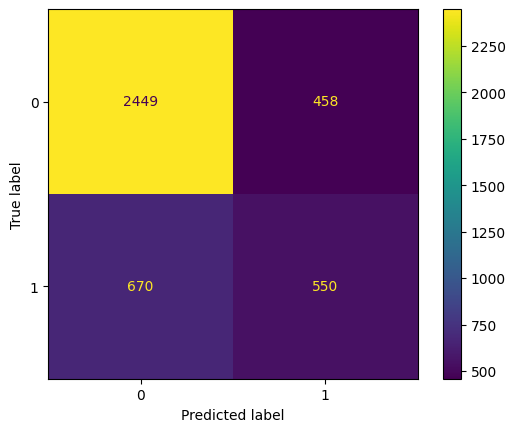

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, classifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2907
           1       0.55      0.45      0.49      1220

    accuracy                           0.73      4127
   macro avg       0.67      0.65      0.65      4127
weighted avg       0.71      0.73      0.72      4127



In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

blurb_train, blurb_test, y_train, y_test = train_test_split(
    X["new"], y, test_size=0.2, random_state=42
)

vectorizer = CountVectorizer()

vectorizer.fit(blurb_train)

X_train = vectorizer.transform(blurb_train)

X_test = vectorizer.transform(blurb_test)

classifier = MultinomialNB()

classifier.fit(X_train, y_train)

MultinomialNB()

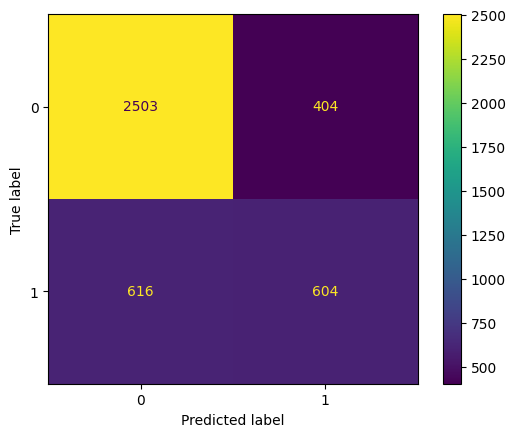

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, classifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [54]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      2907
           1       0.60      0.50      0.54      1220

    accuracy                           0.75      4127
   macro avg       0.70      0.68      0.69      4127
weighted avg       0.74      0.75      0.75      4127



In [55]:
X

,blurb,category_Software,category_Web,category,name,slug,new
0,MTS ASL Curriculum Workbook is a reproducible ...,0,0,Academic,Auntie Di's Music Time Sign ASL for Hearing an...,auntie-dis-music-time-sign-asl-for-hearing-and...,MTS ASL Curriculum Workbook is a reproducible ...
1,"This kit teaches how to print, correct an ugly...",0,0,Academic,Jump Start Kindergarten Toolkit,jump-start-kindergarten-toolkit,"This kit teaches how to print, correct an ugly..."
2,"Establishing a free, world-class, public libra...",0,0,Academic,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,ojukwu-balewa-awolowo-oba-public-library-of-ni...,"Establishing a free, world-class, public libra..."
3,Goal: Introducing a new word into the English ...,0,0,Academic,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",mastize-mas-tahyz-mas-tahyz-to-spread,Goal: Introducing a new word into the English ...
4,Zu den Artikeln der DSGVO sind die korrespondi...,0,0,Academic,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,Zu den Artikeln der DSGVO sind die korrespondi...
...,...,...,...,...,...,...,...
20627,The easy way to be present for story time anyt...,0,0,Apps,"StorySnap: Your voice, their stories... in a s...",storysnap-your-voice-their-stories-in-a-snap,The easy way to be present for story time anyt...
20628,A revolutionary App that makes getting fit as ...,0,0,Apps,Smart Fit!,smart-fit,A revolutionary App that makes getting fit as ...
20629,"We all love fatbooth and Ugly booth, why not s...",0,0,Apps,Sloth Face App,sloth-face-app,"We all love fatbooth and Ugly booth, why not s..."
20630,Production android app for cab drivers and tru...,0,0,Apps,DriverTools,drivertools,Production android app for cab drivers and tru...


In [58]:
dummy_df

,category_Apps,category_Blues,category_Comedy,category_Experimental,category_Festivals,category_Flight,category_Gadgets,category_Hardware,category_Immersive,category_Makerspaces,...,category_Restaurants,category_Robots,category_Shorts,category_Software,category_Sound,category_Spaces,category_Thrillers,category_Wearables,category_Web,category_Webseries
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20627,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20628,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20629,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20630,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X = pd.concat([X, dummy_df], axis=1)

In [71]:
X["new"] = X["blurb"] + "#" + X["name"] + "#" + X["category"]

Epoch 1/6
516/516 [==============================] - 3s 4ms/step - loss: 0.6006 - accuracy: 0.7071 - val_loss: 0.5836 - val_accuracy: 0.7044
Epoch 2/6
516/516 [==============================] - 2s 3ms/step - loss: 0.5360 - accuracy: 0.7265 - val_loss: 0.5262 - val_accuracy: 0.7264
Epoch 3/6
516/516 [==============================] - 2s 3ms/step - loss: 0.4860 - accuracy: 0.7587 - val_loss: 0.5092 - val_accuracy: 0.7429
Epoch 4/6
516/516 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.7693 - val_loss: 0.5116 - val_accuracy: 0.7422
Epoch 5/6
516/516 [==============================] - 2s 3ms/step - loss: 0.4601 - accuracy: 0.7761 - val_loss: 0.5090 - val_accuracy: 0.7461
Epoch 6/6
516/516 [==============================] - 2s 3ms/step - loss: 0.4540 - accuracy: 0.7789 - val_loss: 0.5066 - val_accuracy: 0.7507


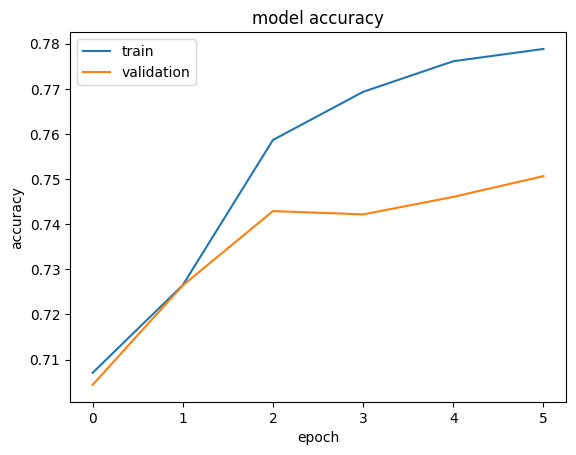

In [77]:
from sklearn.model_selection import train_test_split
# text classification
import tensorflow as tf

blurb_train, blurb_test, y_train, y_test = train_test_split(
    X["new"], y, test_size=0.2, random_state=42
)

# Create a tokenizer to preprocess our text descriptions
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(blurb_train)

# Create training and validation sets using an 80-20 split
training_sequences = tokenizer.texts_to_sequences(blurb_train)
training_padded = tf.keras.preprocessing.sequence.pad_sequences(
    training_sequences, maxlen=100, padding="post", truncating="post"
)

validation_sequences = tokenizer.texts_to_sequences(blurb_test)
validation_padded = tf.keras.preprocessing.sequence.pad_sequences(
    validation_sequences, maxlen=100, padding="post", truncating="post"
)

# Create the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(1000, 16, input_length=100),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]   
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(
    training_padded, y_train, epochs=6, validation_data=(validation_padded, y_test)
)

# Plot the accuracy and loss curves
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, classifier.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

In [237]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)


In [213]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name="ROC curve (area = %0.2f)" % auc,
        line=dict(color="darkorange", width=2),
        text=thresholds,
        hovertemplate="fpr: %{x:.2f}<br>tpr: %{y:.2f}<br>threshold: %{text:.2f}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        name="Random guess",
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    title="Receiver Operating Characteristic",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

              precision    recall  f1-score   support

           0       0.85      0.66      0.74      2907
           1       0.47      0.73      0.57      1220

    accuracy                           0.68      4127
   macro avg       0.66      0.69      0.66      4127
weighted avg       0.74      0.68      0.69      4127



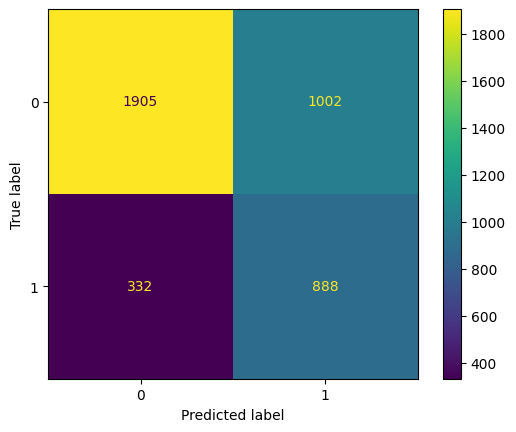

In [228]:
# threshold = 0.2
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.2 else 0 for prob in y_pred_proba]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

# Split into train and test

In [91]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


# Define a model

In [92]:
from sklearn.linear_model import LogisticRegression


logistic_regression_model = LogisticRegression()


# Fit the model

In [93]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

# Predict on test set

In [94]:
predictions_logistic_regression_train = logistic_regression_model.predict(X_train)
predictions_logistic_regression_test = logistic_regression_model.predict(X_test)

In [95]:
train_results_logistic_regression = pd.DataFrame(
    {"Actual": y_train, "Predicted": predictions_logistic_regression_train}
)
test_results_logistic_regression = pd.DataFrame(
    {"Actual": y_test, "Predicted": predictions_logistic_regression_test}
)


# Results

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

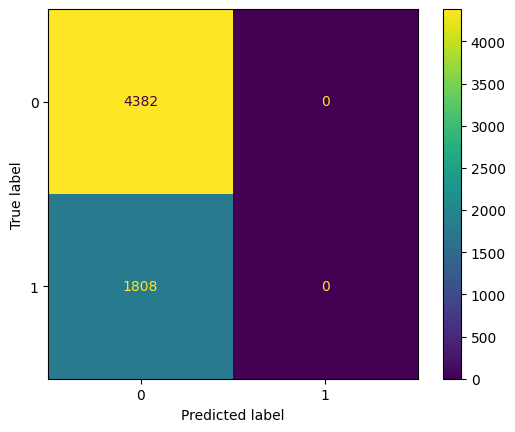

In [97]:
cm = confusion_matrix(y_test, predictions_logistic_regression_test)
ConfusionMatrixDisplay(cm).plot()


In [98]:
from sklearn.metrics import classification_report

In [99]:
print("Classification Report for Logistic Regression Model (Train)")
print(classification_report(y_train, predictions_logistic_regression_train))
print("Classification Report for Logistic Regression Model (Test)")
print(classification_report(y_test, predictions_logistic_regression_test))

Classification Report for Logistic Regression Model (Train)
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10232
           1       0.00      0.00      0.00      4210

    accuracy                           0.71     14442
   macro avg       0.35      0.50      0.41     14442
weighted avg       0.50      0.71      0.59     14442

Classification Report for Logistic Regression Model (Test)
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      4382
           1       0.00      0.00      0.00      1808

    accuracy                           0.71      6190
   macro avg       0.35      0.50      0.41      6190
weighted avg       0.50      0.71      0.59      6190



In [100]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
predictions_proba = logistic_regression_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, predictions_logistic_regression_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba[:, 1])

In [101]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name="ROC curve (area = %0.2f)" % roc_auc,
        line=dict(color="darkorange", width=2),
        text=thresholds,
        hovertemplate="fpr: %{x:.2f}<br>tpr: %{y:.2f}<br>threshold: %{text:.2f}",
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        name="Random guess",
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    title="Receiver Operating Characteristic",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

In [102]:
predictions_logistic_regression_threshold = [
    1 if x > 0.37 else 0 for x in predictions_proba[:, 1]
]
test_results_logistic_regression_threshold = pd.DataFrame(
    {"Actual": y_test, "Predicted": predictions_logistic_regression_threshold}
)

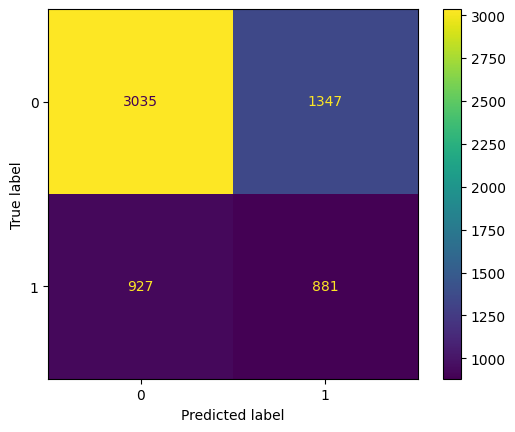

In [103]:
cm = confusion_matrix(y_test, predictions_logistic_regression_threshold)
ConfusionMatrixDisplay(cm).plot()

In [104]:
print(classification_report(y_test, predictions_logistic_regression_threshold))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      4382
           1       0.40      0.49      0.44      1808

    accuracy                           0.63      6190
   macro avg       0.58      0.59      0.58      6190
weighted avg       0.66      0.63      0.64      6190



# KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [120]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [121]:
predictions_knn_train = knn_model.predict(X_train)
predictions_knn_test = knn_model.predict(X_test)

In [122]:
train_results_knn = pd.DataFrame(
    {"Actual": y_train, "Predicted": predictions_knn_train}
)
test_results_knn = pd.DataFrame({"Actual": y_test, "Predicted": predictions_knn_test})


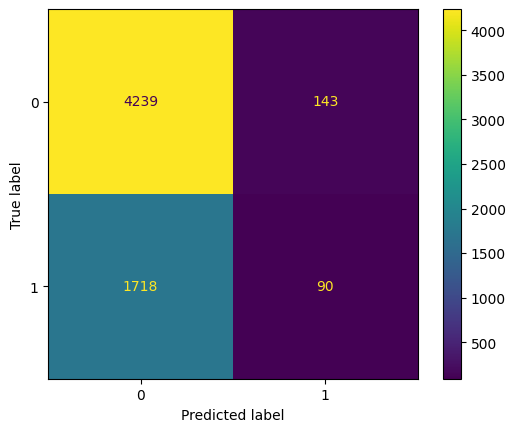

In [123]:
cm = confusion_matrix(y_test, predictions_knn_test)
ConfusionMatrixDisplay(cm).plot()

In [111]:
print("Classification Report for KNN Model (Train)")
print(classification_report(y_train, predictions_knn_train))
print("Classification Report for KNN Model (Test)")
print(classification_report(y_test, predictions_knn_test))

Classification Report for KNN Model (Train)
              precision    recall  f1-score   support

           0       0.71      0.96      0.82     10232
           1       0.40      0.06      0.11      4210

    accuracy                           0.70     14442
   macro avg       0.56      0.51      0.46     14442
weighted avg       0.62      0.70      0.61     14442

Classification Report for KNN Model (Test)
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      4382
           1       0.39      0.05      0.09      1808

    accuracy                           0.70      6190
   macro avg       0.55      0.51      0.45      6190
weighted avg       0.62      0.70      0.61      6190



In [112]:
l = []
for i in range(1, 201, 2):
    knni = KNeighborsClassifier(n_neighbors=i)
    knni.fit(X_train, y_train)
    predictions_knni_test = knni.predict(X_test)
    l.append((i, knni.score(X_test, y_test)))

In [113]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs K",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()

# Random forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [126]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [127]:
predictions_rfc_train = rfc_model.predict(X_train)
predictions_rfc_test = rfc_model.predict(X_test)

In [128]:
train_results_rfc = pd.DataFrame(
    {"Actual": y_train, "Predicted": predictions_rfc_train}
)
test_results_rfc = pd.DataFrame({"Actual": y_test, "Predicted": predictions_rfc_test})


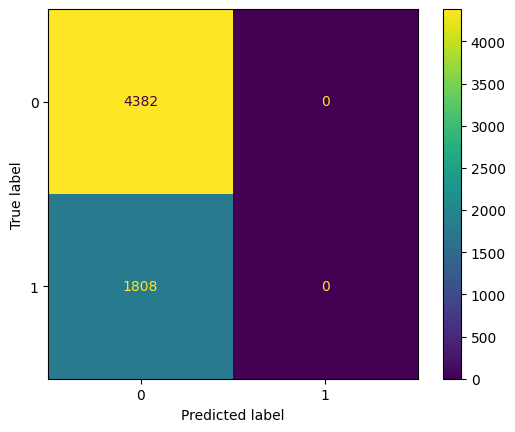

In [129]:
cm = confusion_matrix(y_test, predictions_rfc_test)
ConfusionMatrixDisplay(cm).plot()

In [130]:
print("Classification Report for Random Forest Model (Train)")
print(classification_report(y_train, predictions_rfc_train))
print("Classification Report for Random Forest Model (Test)")
print(classification_report(y_test, predictions_rfc_test))

Classification Report for Random Forest Model (Train)
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     10232
           1       0.00      0.00      0.00      4210

    accuracy                           0.71     14442
   macro avg       0.35      0.50      0.41     14442
weighted avg       0.50      0.71      0.59     14442

Classification Report for Random Forest Model (Test)
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      4382
           1       0.00      0.00      0.00      1808

    accuracy                           0.71      6190
   macro avg       0.35      0.50      0.41      6190
weighted avg       0.50      0.71      0.59      6190



In [131]:
l = []
for i in range(100, 1100, 100):
    print(i, end="\r")
    rfi = RandomForestClassifier(i, random_state=42, criterion="entropy")
    rfi.fit(X_train, y_train)
    predictions_rfi_test = rfi.predict(X_test)
    l.append((i, rfi.score(X_test, y_test)))

In [132]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[i[0] for i in l],
        y=[i[1] for i in l],
        mode="lines+markers",
        marker_color="rgb(171, 226, 251)",
    )
)
fig.update_layout(
    title="Accuracy vs n_estimators",
    title_x=0.5,
    width=800,
    height=800,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)
fig.show()
    